<a href="https://colab.research.google.com/github/XavierDebuf/DL_Heart_Disease/blob/main/ecg_notebook_final_xavier_debuf_version_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from scipy import signal
import numpy as np
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [3]:
ptbdb_normal = pd.read_csv('./ecg/ptbdb_normal.csv',header=None)
ptbdb_abnormal = pd.read_csv('./ecg/ptbdb_abnormal.csv',header=None)
mitbih_test = pd.read_csv('./ecg/mitbih_test.csv',header=None)
mitbih_train = pd.read_csv('./ecg/mitbih_train.csv',header=None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=ptbdb_normal
df2=ptbdb_abnormal


df_i=pd.concat([df1,df2],ignore_index=True,sort=False)
df_i.isnull().sum().sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=mitbih_test
df2=mitbih_train


df_a=pd.concat([df1,df2],ignore_index=True,sort=False)
df_a.isnull().sum().sum()

# MACHINE LEARNING

In [164]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [165]:
import imblearn
from imblearn.over_sampling import SMOTE

# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X,y)
y_oversampled.value_counts()

187
0.0    90589
1.0    90589
2.0    90589
3.0    90589
4.0    90589
Name: count, dtype: int64

In [166]:

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.25, random_state=28)

# regression logistique

## Anomalie cardiaque

In [167]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
y_pred=lr.predict(X_test)

In [169]:
lr.score(X_test,y_test)

0.7809108330316062

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62     22797
         1.0       0.81      0.72      0.76     22746
         2.0       0.74      0.77      0.75     22554
         3.0       0.82      0.88      0.85     22418
         4.0       0.93      0.92      0.93     22722

    accuracy                           0.78    113237
   macro avg       0.78      0.78      0.78    113237
weighted avg       0.78      0.78      0.78    113237



### Infarctus du myocarde

In [171]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [172]:
import imblearn
from imblearn.over_sampling import SMOTE

# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X,y)
y_oversampled.value_counts()

187
0.0    10506
1.0    10506
Name: count, dtype: int64

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.25, random_state=28)

In [174]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [175]:
y_pred=lr.predict(X_test)

In [176]:
lr.score(X_test,y_test)

0.8166761850371217

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82      2604
         1.0       0.85      0.78      0.81      2649

    accuracy                           0.82      5253
   macro avg       0.82      0.82      0.82      5253
weighted avg       0.82      0.82      0.82      5253



# SVM


## Anomalie cardiaque

In [178]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [179]:
import imblearn
from imblearn.over_sampling import SMOTE

# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X,y)
y_oversampled.value_counts()

187
0.0    90589
1.0    90589
2.0    90589
3.0    90589
4.0    90589
Name: count, dtype: int64

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.25, random_state=28)

In [181]:
svc = SVC()

In [182]:
svc.fit(X_train, y_train)

SVC()

In [183]:
y_pred_svc = svc.predict(X_test)

In [184]:
svc.score(X_test,y_test)

0.9685526815440183

In [185]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     22797
         1.0       0.96      0.96      0.96     22746
         2.0       0.99      0.97      0.98     22554
         3.0       0.95      1.00      0.97     22418
         4.0       1.00      0.99      0.99     22722

    accuracy                           0.97    113237
   macro avg       0.97      0.97      0.97    113237
weighted avg       0.97      0.97      0.97    113237



### Infarctus du myocarde

In [186]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]

In [187]:
import imblearn
from imblearn.over_sampling import SMOTE
# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X,y)
y_oversampled.value_counts()

187
0.0    10506
1.0    10506
Name: count, dtype: int64

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.25, random_state=28)

In [189]:
svc = SVC()

In [190]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svc))

# DEEP LEARNING

# Réseau de neurones dense

## appliqués au dataset mitibih

In [46]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [47]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [48]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [49]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau




In [50]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [52]:
batch_size = 32
epochs = 30
inputs = Input(shape = X_sm.shape[1], name = "Input")
dense1 = Dense(units = 10, activation = "tanh", name = "dense1", kernel_initializer="normal")
dense2 = Dense(units = 8, activation = "tanh", name = "dense2", kernel_initializer="normal")
dense3 = Dense(units = 6, activation = "tanh", name = "dense3", kernel_initializer="normal")
dense4 = Dense(units = 5, activation = "softmax", name = "dense4", kernel_initializer="normal")

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

model_d = Model(inputs = inputs, outputs = outputs)
model_d.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 187)]             0         
                                                                 
 dense1 (Dense)              (None, 10)                1880      
                                                                 
 dense2 (Dense)              (None, 8)                 88        
                                                                 
 dense3 (Dense)              (None, 6)                 54        
                                                                 
 dense4 (Dense)              (None, 5)                 35        
                                                                 
Total params: 2057 (8.04 KB)
Trainable params: 2057 (8.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model_d.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [54]:
history = model_d.fit(X_train, y_train, epochs=epochs, validation_split = 0.2,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size)

Epoch 1/30
8493/8493 [==============================] - 38s 4ms/step - loss: 0.5541 - accuracy: 0.8037 - val_loss: 0.3826 - val_accuracy: 0.8771 - lr: 0.0010
Epoch 2/30
8493/8493 [==============================] - 38s 4ms/step - loss: 0.3513 - accuracy: 0.8851 - val_loss: 0.3449 - val_accuracy: 0.8888 - lr: 0.0010
Epoch 3/30
8493/8493 [==============================] - 37s 4ms/step - loss: 0.3250 - accuracy: 0.8944 - val_loss: 0.3266 - val_accuracy: 0.8946 - lr: 0.0010
Epoch 4/30
8493/8493 [==============================] - 38s 4ms/step - loss: 0.3113 - accuracy: 0.8993 - val_loss: 0.3208 - val_accuracy: 0.8943 - lr: 0.0010
Epoch 5/30
8493/8493 [==============================] - 39s 5ms/step - loss: 0.3014 - accuracy: 0.9020 - val_loss: 0.2983 - val_accuracy: 0.9018 - lr: 0.0010
Epoch 6/30
8493/8493 [==============================] - 35s 4ms/step - loss: 0.2944 - accuracy: 0.9042 - val_loss: 0.2932 - val_accuracy: 0.9032 - lr: 0.0010
Epoch 7/30
8493/8493 [==============================

In [55]:

model_d.save('./model_dense_mitbih.h5')

/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
_ , accuracy= model_d.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

3539/3539 [==============================] - 12s 3ms/step - loss: 0.2470 - accuracy: 0.9204


In [57]:
print('accuracy', accuracy)

accuracy 0.9204235076904297


In [58]:
test_pred_class = model_d.predict(X_test).argmax(axis = 1)
pd.crosstab(y_test, test_pred_class, rownames = ["reel"], colnames = ["predict"])

3539/3539 [==============================] - 10s 3ms/step


predict,0,1,2,3,4
reel,,,,,
0.0,20132,1064,717,493,391
1.0,2295,20188,147,88,28
2.0,750,59,20960,641,144
3.0,930,50,570,20852,16
4.0,336,28,238,26,22094


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


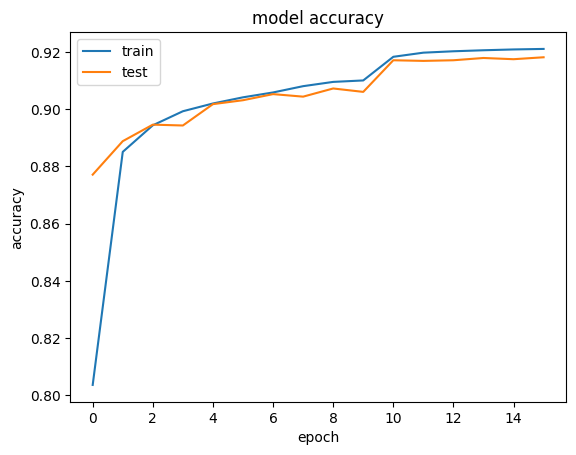

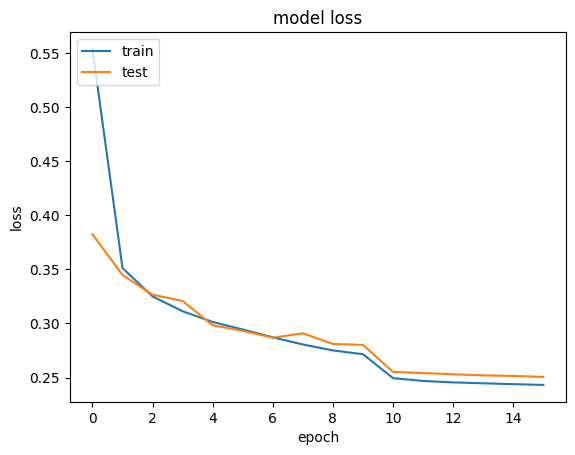

In [59]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## appliqués au dataset ptbdb

In [60]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [61]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [62]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [63]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [64]:
batch_size = 32
epochs = 30

In [65]:
inputs = Input(shape = X_train.shape[1], name = "Input")
dense1 = Dense(units = 10, activation = "tanh", name = "dense1", kernel_initializer="normal")
dense2 = Dense(units = 8, activation = "tanh", name = "dense2", kernel_initializer="normal")
dense3 = Dense(units = 6, activation = "tanh", name = "dense3", kernel_initializer="normal")
dense4 = Dense(units = 2, activation = "softmax", name = "dense4", kernel_initializer="normal")

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

model_b = Model(inputs = inputs, outputs = outputs)
model_b.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 187)]             0         
                                                                 
 dense1 (Dense)              (None, 10)                1880      
                                                                 
 dense2 (Dense)              (None, 8)                 88        
                                                                 
 dense3 (Dense)              (None, 6)                 54        
                                                                 
 dense4 (Dense)              (None, 2)                 14        
                                                                 
Total params: 2036 (7.95 KB)
Trainable params: 2036 (7.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model_b.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='accuracy')

In [68]:
histo_dense = model_b.fit(X_train, y_train, epochs=epochs, validation_split = 0.2,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size)

Epoch 1/30


ValueError: in user code:

    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.9/dist-packages/keras/src/backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [ ]:
model_b.save('./model_dense_ptbdb.h5')

In [ ]:
test_pred_class = model_b.predict(X_test).argmax(axis = 1)
rounded_labels_b=np.argmax(y_test, axis=1)
pd.crosstab(rounded_labels_b, test_pred_class, rownames = ["reel"], colnames = ["predict"])

# CONV_Net

## conv net apppliqué aux dataset mitbih

In [69]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [70]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [71]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [72]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [74]:
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [75]:
print(X_train_cnn.shape, y_sm.shape, X_test_cnn.shape, y_test.shape)


(452945, 187, 1) (452945,) (113237, 187, 1) (113237, 5)


In [76]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [77]:
batch_size=32
verbose=1
epochs = 50

In [78]:
inputs = Input(shape = (X_sm.shape[1],1), name = "Input")
conv1_lenet = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_lenet = MaxPooling1D(pool_size = 2)
conv2_lenet = Conv1D(filters = 16, kernel_size = 3, padding = "valid", activation = "relu")
pool2_lenet = MaxPooling1D(pool_size = 2)
dropout_lenet = Dropout(rate=0.2)
flatten_lenet = Flatten()
dense1_lenet = Dense(units = 128, activation="relu")
dense2_lenet = Dense(units = 5, activation="softmax")

x = conv1_lenet(inputs)
x = pool1_lenet(x)
x = conv2_lenet(x)
x = pool2_lenet(x)
x = dropout_lenet(x)
x = flatten_lenet(x)
x = dense1_lenet(x)
outputs = dense2_lenet(x)


model_lenet = Model(inputs = inputs, outputs = outputs)
model_lenet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1 = model_lenet.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=32,validation_split = 0.2, verbose=1)
_, accuracy = model_lenet.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.9/dist-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.9/dist-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible


In [ ]:
accuracy


In [ ]:
pred_class_1 = model_lenet.predict(X_test).argmax(axis = 1)
rounded_labels_1=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_1, pred_class_1, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_1, pred_class_1))

In [ ]:
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## conv net apppliqué aux dataset ptbdb

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [ ]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [ ]:
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [ ]:
inputs = Input(shape = (X_sm.shape[1],1), name = "Input")
conv1_lenet = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_lenet = MaxPooling1D(pool_size = 2)
conv2_lenet = Conv1D(filters = 16, kernel_size = 3, padding = "valid", activation = "relu")
pool2_lenet = MaxPooling1D(pool_size = 2)
dropout_lenet = Dropout(rate=0.2)
flatten_lenet = Flatten()
dense1_lenet = Dense(units = 128, activation="relu")
dense2_lenet = Dense(units = 2, activation="softmax")

x = conv1_lenet(inputs)
x = pool1_lenet(x)
x = conv2_lenet(x)
x = pool2_lenet(x)
x = dropout_lenet(x)
x = flatten_lenet(x)
x = dense1_lenet(x)
outputs = dense2_lenet(x)


model_lenpt = Model(inputs = inputs, outputs = outputs)
model_lenpt.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
history_ptb = model_lenpt.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=32,validation_split = 0.2, verbose=1)
_, mse, accuracy = model_lenpt.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

In [ ]:
print('accuracy:', accuracy)

pred_class_9 = model_lenpt.predict(X_test).argmax(axis = 1)
rounded_labels_9=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_9, pred_class_9, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_9, pred_class_9))


In [ ]:
print(history_ptb.history.keys())
# summarize history for accuracy
plt.plot(history_ptb.history['accuracy'])
plt.plot(history_ptb.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_ptb.history['loss'])
plt.plot(history_ptb.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Réseau de Neurones Convolutifs

## appliqué au dataset mitibih

## Meilleur model  Reseau convolutif. Données augmentée avec les proéminences des pics en valeurs numériques

In [79]:
X=df_a.iloc[:,:-1]
x_state=X
y=df_a.iloc[:,-1]

In [89]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [81]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)


In [82]:
def distrib_proeminence(df):
    prominences = []
    for i in range (len(df)):
        x=df.iloc[i,:]
        peaks, _ = signal.find_peaks(x)
        pro=signal.peak_prominences(x, peaks)[0]
        prominences.append(pro)
    pro_S = pd.DataFrame(prominences)
    return pro_S

In [83]:
df_proem = distrib_proeminence(X_sm)
#df_drop_last = df_proem_test_train.iloc[:,-1]
df_proem = df_proem.add_prefix('pro_')
#df = pd.concat([df,pro_S], axis =1)
X_sm = pd.concat([X_sm,df_proem], axis =1)

In [84]:
X_sm.info()
def format_col(df):
    list_int= [i for i in range(len(df.columns))]
    df.columns=list_int
    return df
format_col(X)
X=X.fillna(-0.15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452945 entries, 0 to 452944
Columns: 275 entries, 0 to pro_87
dtypes: float64(275)
memory usage: 950.3 MB


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [86]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model_a = Sequential()
model_a.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model_a.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_a.add(BatchNormalization())
model_a.add(MaxPooling1D(pool_size=2))
model_a.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model_a.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_a.add(BatchNormalization())
model_a.add(MaxPooling1D(pool_size=2))
model_a.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model_a.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model_a.add(BatchNormalization())
model_a.add(MaxPooling1D(pool_size=2))
model_a.add(Flatten())
model_a.add(Dense(125, activation='relu'))
model_a.add(Dense(n_outputs, activation='softmax'))
model_a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_a = model_a.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
model_a.save('/content/drive/MyDrive/heart_peak/model_mycnn_mitbih_2.h5')
_, accuracy = model_a.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print('accuracy',accuracy )

pred_class_a = model_a.predict(X_test).argmax(axis = 1)
rounded_labels_a=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_a, pred_class_a, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_a, pred_class_a))

In [ ]:
print(history_a.history.keys())
# summarize history for accuracy
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/heart_peak/acc_model_a')
plt.show()
# summarize history for loss
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/heart_peak/loss_model_a')
plt.show()

## Section sans augmentation d'information, recherche du meilleur modèle travaux prélimnaire sans ajout de proéminences

In [92]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [93]:
X=df_a.iloc[:,:-1]
x_state=X
y=df_a.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [94]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [95]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [96]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
y_train = to_categorical(y_train)

In [98]:
y_test = to_categorical(y_test)

In [109]:
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [110]:
print(X_train_cnn.shape, y_train.shape, X_test_cnn.shape, y_test.shape)


(339708, 187, 1) (339708, 5) (113237, 187, 1) (113237, 5)


In [111]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [113]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
model1 = Sequential()
model1.add(Conv1D(filters=128, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model1.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(125, activation='relu'))
model1.add(Dense(n_outputs, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1 = model1.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
model1.save('./model_mycnn_mitbih_modelbest_128.h5')
_, accuracy = model1.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

Epoch 1/50
8493/8493 [==============================] - 497s 58ms/step - loss: 0.2000 - accuracy: 0.9298 - val_loss: 0.1147 - val_accuracy: 0.9619 - lr: 0.0010
Epoch 2/50
8493/8493 [==============================] - 466s 55ms/step - loss: 0.0964 - accuracy: 0.9664 - val_loss: 0.0949 - val_accuracy: 0.9664 - lr: 0.0010
Epoch 3/50
8493/8493 [==============================] - 460s 54ms/step - loss: 0.0660 - accuracy: 0.9775 - val_loss: 0.0539 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 4/50
8493/8493 [==============================] - 438s 52ms/step - loss: 0.0503 - accuracy: 0.9829 - val_loss: 0.0456 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 5/50
8493/8493 [==============================] - 423s 50ms/step - loss: 0.0406 - accuracy: 0.9863 - val_loss: 0.0424 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 6/50
8493/8493 [==============================] - 433s 51ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0321 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 7/50
8493/8493 [==================

/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3539/3539 [==============================] - 57s 16ms/step - loss: 0.0137 - accuracy: 0.9962


In [141]:
print('accuracy:',accuracy)

pred_class_1 = model1.predict(X_test).argmax(axis = 1)
rounded_labels_1=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_1, pred_class_1, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_1, pred_class_1))

accuracy: 0.9961761832237244
2831/2831 [==============================] - 58s 20ms/step
predict      0      1      2     3     4
reel                                    
0         3328   4264   9938   632   100
1          901  10254   5997   688     3
2         1165   1945  12606  2143   142
3        10641    794   5171  1669     1
4          147    125   7816   722  9397
                   pre       rec       spe        f1       geo       iba       sup

          0       0.21      0.18      0.82      0.19      0.39      0.14     18262
          1       0.59      0.57      0.90      0.58      0.72      0.50     17843
          2       0.30      0.70      0.60      0.42      0.65      0.43     18001
          3       0.29      0.09      0.94      0.14      0.29      0.08     18276
          4       0.97      0.52      1.00      0.67      0.72      0.49     18207

avg / total       0.47      0.41      0.85      0.40      0.55      0.33     90589



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


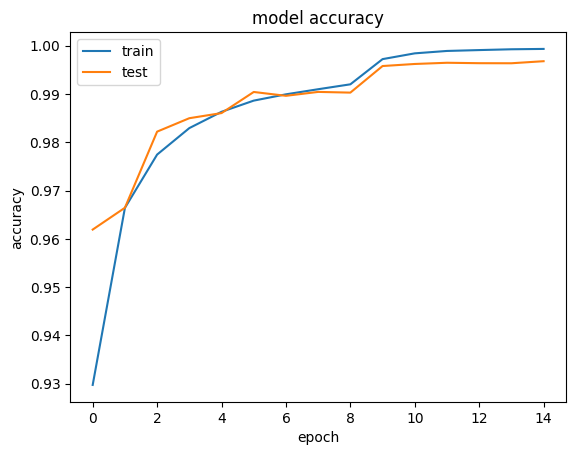

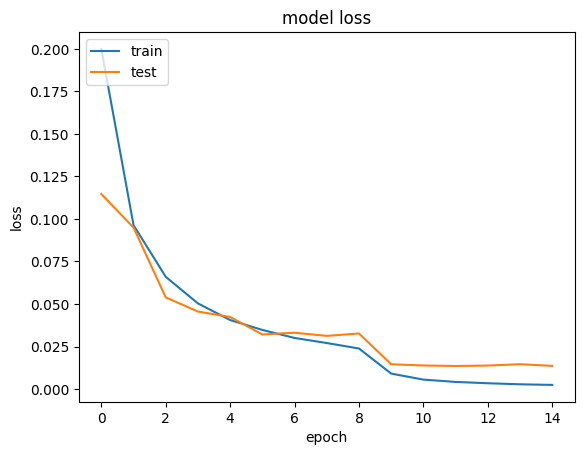

In [142]:
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 256


In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
modelb = Sequential()
modelb.add(Conv1D(filters=256, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
modelb.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(MaxPooling1D(pool_size=2))
modelb.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
modelb.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(MaxPooling1D(pool_size=2))
modelb.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
modelb.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(MaxPooling1D(pool_size=2))
modelb.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
modelb.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(MaxPooling1D(pool_size=2))
modelb.add(Flatten())
modelb.add(Dense(125, activation='relu'))
modelb.add(Dense(5, activation='softmax'))
modelb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_b = modelb.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
modelb.save('/content/drive/MyDrive/heart_peak/model_mycnn_mitbih_modelbest_256.h5')
_, accuracy = modelb.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print(accuracy:', mse, accuracy)

pred_classb = modelb.predict(X_test).argmax(axis = 1)
rounded_labelsb=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labelsb, pred_classb, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labelsb, pred_classb))

In [ ]:
print(history_b.history.keys())
# summarize history for accuracy
plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model2 = Sequential()
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu',input_shape=(n_timesteps,n_features)))
model2.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(125, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2 = model2.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy = model2.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print('accuracy:', accuracy)

pred_class_2 = model2.predict(X_test).argmax(axis = 1)
rounded_labels_2=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_2, pred_class_2, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_2, pred_class_2))

In [ ]:
print(history_2.history.keys())
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [143]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model3.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(125, activation='relu'))
model3.add(Dense(n_outputs, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_3 = model3.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy = model3.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

Epoch 1/50
9059/9059 [==============================] - 350s 38ms/step - loss: 0.1355 - accuracy: 0.9529 - val_loss: 0.2067 - val_accuracy: 0.9301 - lr: 0.0010
Epoch 2/50
9059/9059 [==============================] - 396s 44ms/step - loss: 0.0550 - accuracy: 0.9817 - val_loss: 0.0484 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 3/50
9059/9059 [==============================] - 392s 43ms/step - loss: 0.0388 - accuracy: 0.9869 - val_loss: 0.0467 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 4/50
9059/9059 [==============================] - 396s 44ms/step - loss: 0.0307 - accuracy: 0.9898 - val_loss: 0.0411 - val_accuracy: 0.9864 - lr: 0.0010
Epoch 5/50
9058/9059 [============================>.] - ETA: 0s - loss: 0.0249 - accuracy: 0.9917
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
9059/9059 [==============================] - 385s 43ms/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0468 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 6/50
9059/9059 [==============

In [145]:
model3.save('./model3.h5')

/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [146]:
print('accuracy:',accuracy)

pred_class_3 = model3.predict(X_test).argmax(axis = 1)
rounded_labels_3=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_3, pred_class_3, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_3, pred_class_3))

accuracy: 0.996235728263855
2831/2831 [==============================] - 35s 12ms/step
predict      0      1      2      3      4
reel                                      
0        18049     97     52     46     18
1           22  17820      0      0      1
2           15      7  17916     62      1
3            5      0      0  18271      0
4            8      0      4      3  18192
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.99     18262
          1       0.99      1.00      1.00      1.00      1.00      1.00     17843
          2       1.00      1.00      1.00      1.00      1.00      0.99     18001
          3       0.99      1.00      1.00      1.00      1.00      1.00     18276
          4       1.00      1.00      1.00      1.00      1.00      1.00     18207

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     90589



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


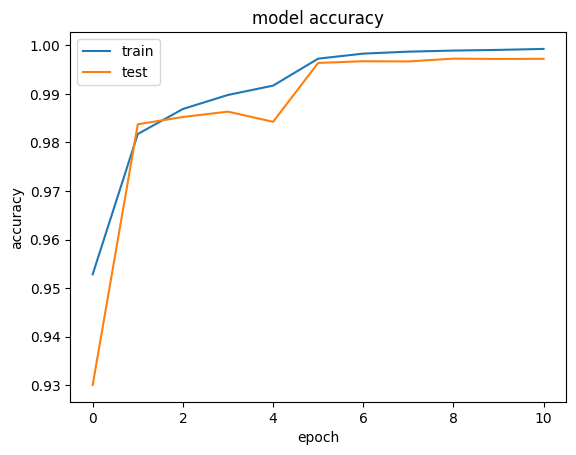

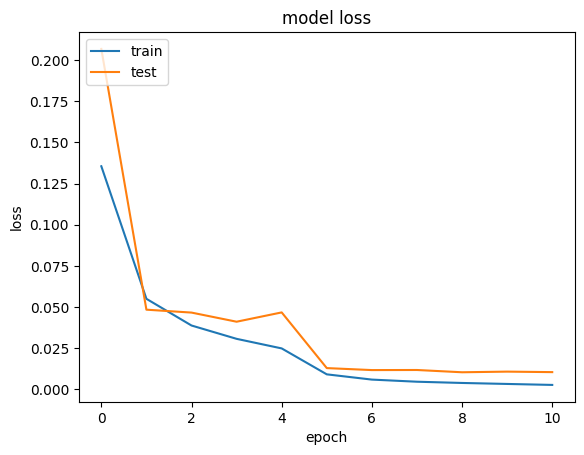

In [152]:
print(history_3.history.keys())
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 20,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model4 = Sequential()
model4.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model4.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model4.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model4.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(125, activation='relu'))
model4.add(Dense(n_outputs, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_4 = model4.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
model4.save('./model4.h5')

In [ ]:
_, accuracy = model4.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print('accuracy:', accuracy )

pred_class_4 = model4.predict(X_test).argmax(axis = 1)
rounded_labels_4=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_4, pred_class_4, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_4, pred_class_4))

In [ ]:
print(history_4.history.keys())
# summarize history for accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [147]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 10,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [148]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
model5 = Sequential()
model5.add(Conv1D(filters=32, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model5.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))
model5.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model5.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(125, activation='relu'))
model5.add(Dense(n_outputs, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_5 = model5.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy = model5.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
model5.save('./model5.h5')

Epoch 1/50
9059/9059 [==============================] - 206s 23ms/step - loss: 0.1123 - accuracy: 0.9613 - val_loss: 0.1253 - val_accuracy: 0.9543 - lr: 0.0010
Epoch 2/50
9059/9059 [==============================] - 224s 25ms/step - loss: 0.0415 - accuracy: 0.9862 - val_loss: 0.0348 - val_accuracy: 0.9889 - lr: 0.0010
Epoch 3/50
9059/9059 [==============================] - 232s 26ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0274 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 4/50
9059/9059 [==============================] - 237s 26ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0286 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 5/50
9057/9059 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9947
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
9059/9059 [==============================] - 231s 26ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0322 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 6/50
9059/9059 [==============

/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [149]:
print('accuracy:', accuracy )

pred_class_5 = model5.predict(X_test).argmax(axis = 1)
rounded_labels_5=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_5, pred_class_5, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_5, pred_class_5))

accuracy: 0.9968980550765991
2831/2831 [==============================] - 25s 9ms/step
predict      0      1      2      3      4
reel                                      
0        18085     85     39     35     18
1           15  17827      0      1      0
2           15      0  17925     60      1
3            0      0      2  18274      0
4            8      0      1      1  18197
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.99     18262
          1       1.00      1.00      1.00      1.00      1.00      1.00     17843
          2       1.00      1.00      1.00      1.00      1.00      0.99     18001
          3       0.99      1.00      1.00      1.00      1.00      1.00     18276
          4       1.00      1.00      1.00      1.00      1.00      1.00     18207

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     90589



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


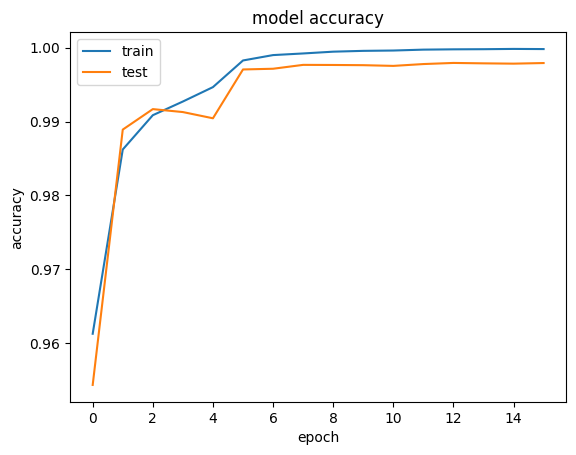

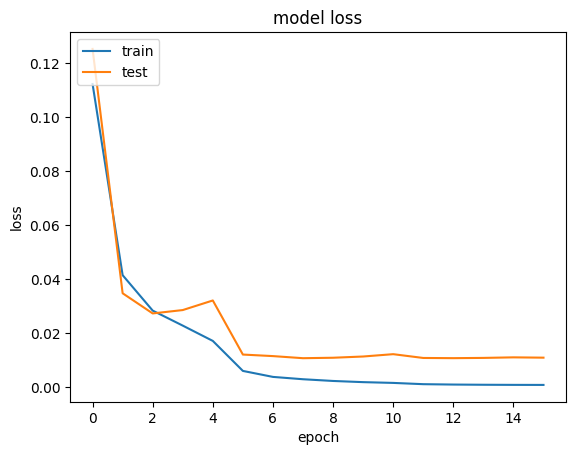

In [150]:
print(history_5.history.keys())
# summarize history for accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model6 = Sequential()
model6.add(Conv1D(filters=32, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model6.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))
model6.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model6.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(125, activation='relu'))
model6.add(Dense(n_outputs, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_6 = model6.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy = model6.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

In [ ]:
print('accuracy:', accuracy )

pred_class_6 = model6.predict(X_test).argmax(axis = 1)
rounded_labels_6=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_6, pred_class_6, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_6, pred_class_6))

In [ ]:
print(history_6.history.keys())
# summarize history for accuracy
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model7 = Sequential()
model7.add(Conv1D(filters=32, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model7.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))
model7.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model7.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))
model7.add(Flatten())
model7.add(Dense(125, activation='relu'))
model7.add(Dense(n_outputs, activation='softmax'))
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_7 = model7.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, accuracy= model7.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
model7.save('/content/drive/MyDrive/heart_peak/model7')

In [ ]:
print('mae',  mae, accuracy )

pred_class_7 = model7.predict(X_test).argmax(axis = 1)
rounded_labels_7=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_7, pred_class_7, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_7, pred_class_7))

In [ ]:
print(history_7.history.keys())
# summarize history for accuracy
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_model_anomalie')
plt.show()
# summarize history for loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_anomalie')
plt.show()

## appliqué au dataset ptbdb meilleur modèle

In [153]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [154]:
X=df_i.iloc[:,:-1]
y=df_i.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [155]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=28)

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [157]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [158]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [159]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 10,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [160]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_train.shape[1]
model_11 = Sequential()
model_11.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model_11.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_11.add(Dropout(0.5))
model_11.add(MaxPooling1D(pool_size=2))
model_11.add(Flatten())
model_11.add(Dense(100, activation='relu'))
model_11.add(Dense(2, activation='softmax'))
model_11.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
history_11=model_11.fit(X_train, y_train, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
model_11.save('./model_mycnn_mitbih_2.h5')


Epoch 1/50
394/394 [==============================] - 11s 24ms/step - loss: 0.3139 - accuracy: 0.8654 - val_loss: 0.1898 - val_accuracy: 0.9324 - lr: 0.0010
Epoch 2/50
394/394 [==============================] - 11s 28ms/step - loss: 0.1529 - accuracy: 0.9438 - val_loss: 0.1318 - val_accuracy: 0.9575 - lr: 0.0010
Epoch 3/50
394/394 [==============================] - 10s 26ms/step - loss: 0.0983 - accuracy: 0.9667 - val_loss: 0.0862 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 4/50
394/394 [==============================] - 10s 25ms/step - loss: 0.0684 - accuracy: 0.9760 - val_loss: 0.0622 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 5/50
394/394 [==============================] - 10s 26ms/step - loss: 0.0511 - accuracy: 0.9810 - val_loss: 0.0579 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 6/50
394/394 [==============================] - 10s 25ms/step - loss: 0.0386 - accuracy: 0.9864 - val_loss: 0.0404 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 7/50
394/394 [==============================] - 9s 2

/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [161]:
_, accuracy = model_11.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

165/165 [==============================] - 2s 12ms/step - loss: 0.0274 - accuracy: 0.9914


In [162]:
print(' accuracy', accuracy )

pred_class_11 = model_11.predict(X_test).argmax(axis = 1)
rounded_labels_11=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_11, pred_class_11, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_11, pred_class_11))

 accuracy 0.9914334416389465
165/165 [==============================] - 2s 10ms/step
predict     0     1
reel               
0        2575    29
1          16  2633
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.99      0.99      0.99      0.98      2604
          1       0.99      0.99      0.99      0.99      0.99      0.98      2649

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      5253



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


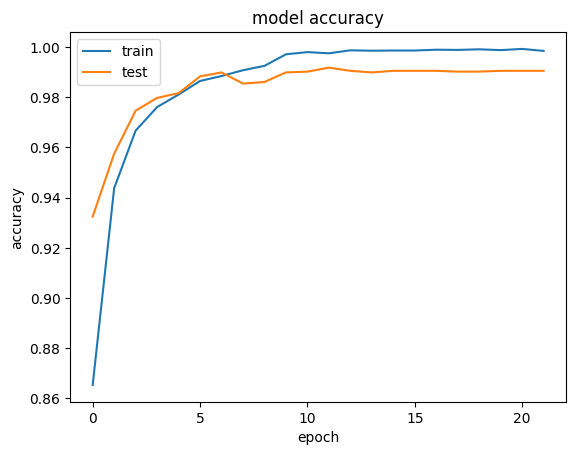

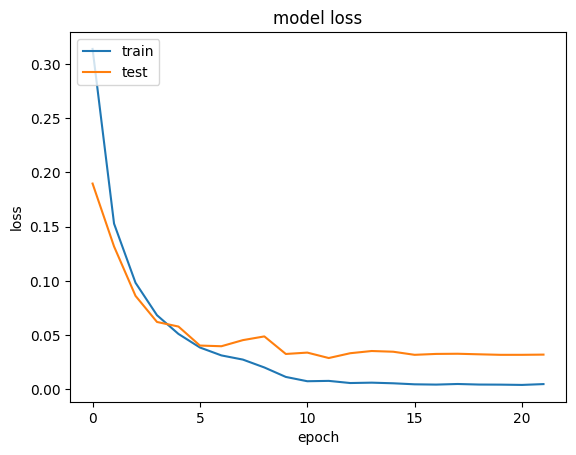

In [163]:
print(history_11.history.keys())
# summarize history for accuracy
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./acc_model_ptb.png')
plt.show()
# summarize history for loss
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./loss_model_ptb.png')
plt.show()

# *pipeline de transformation markov image pour conv2D*

In [114]:
pip install pyts

     |████████████████████████████████| 2.5 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 46.8 MB/s eta 0:00:01██▌             | 2.1 MB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 42.1 MB 53 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [116]:
import pandas as pd
from scipy import signal
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from pyts.image import GramianAngularField
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from PIL import Image
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [117]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler


In [118]:
X=df_a.iloc[:,:-1]
y=df_a.iloc[:,-1]

In [119]:
smote = SMOTE()

In [120]:
X_rs, y_rs = smote.fit_resample(X, y)

In [121]:
y_rs.shape


(452945,)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.20, random_state=321)

In [123]:
X_train.shape

(362356, 187)

In [124]:
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

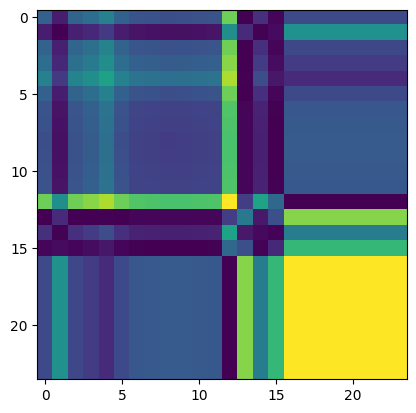

In [126]:
gaf = GramianAngularField(image_size=24)
im_train = gaf.fit_transform(X_train)
im_test = gaf.transform(X_test)

# plot one image

plt.imshow(im_test[0])

plt.savefig('./img/markov_0.png')

plt.imshow(im_test[10000])
plt.savefig('./img/markov_10000.png')
plt.imshow(im_test[30000])
plt.savefig('./img/markov_30000.png')
plt.imshow(im_test[40000])
plt.savefig('./img/markov_40000.png')
plt.imshow(im_test[50000])
plt.savefig('./img/markov_50000.png')
plt.imshow(im_test[60000])
plt.savefig('./img/markov_60000.png')
plt.imshow(im_test[70000])
plt.savefig('./img/markov_70000.png')
plt.imshow(im_test[80000])
plt.savefig('./img/markov_80000.png')
plt.imshow(im_test[90000])
plt.savefig('./img/markov_90000.png')
plt.imshow(im_test[30001])
plt.savefig('./img/markov_30001.png')
plt.imshow(im_test[40001])
plt.savefig('./img/markov_40001.png')
plt.imshow(im_test[50001])
plt.savefig('./img/markov_50001.png')
plt.imshow(im_test[60001])
plt.savefig('./img/markov_60001.png')
plt.imshow(im_test[70001])
plt.savefig('./img/markov_70001.png')
plt.imshow(im_test[80001])
plt.savefig('./img/markov_80001.png')
plt.imshow(im_test[90001])
plt.savefig('./img/markov_90001.png')


In [127]:
im_train.shape

(362356, 24, 24)

In [128]:
im_test.shape

(90589, 24, 24)

In [129]:
def standardize(image_data):
        image_data -= np.mean(image_data, axis=0)
        image_data /= np.std(image_data, axis=0)
        return image_data

In [130]:
im_train = standardize(im_train)

In [131]:
im_train.shape

(362356, 24, 24)

In [132]:
im_test = standardize(im_test)

In [133]:
HEIGHT=12
WIDTH=16

In [134]:
BATCH_SIZE = 32

In [135]:
channels=3

In [136]:
im_train= im_train.reshape(im_train.shape[0],HEIGHT,WIDTH,channels)
im_test= im_test.reshape(im_test.shape[0],HEIGHT,WIDTH,channels)
im_train.shape

(362356, 12, 16, 3)

In [137]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1,
                        cooldown = 4,
                        verbose = 1)

In [138]:
verbose, epochs, batch_size = 1, 50 , 32
model=Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(32, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(125, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_a = model.fit(im_train, y_train, epochs=epochs,callbacks=[reduce_learning_rate, early_stopping],
                      batch_size=batch_size,validation_data=(im_test, y_test), verbose=verbose)

m_, accuracy = model.evaluate(im_test, y_test, batch_size=batch_size, verbose=verbose)
accuracy

Epoch 1/50
11324/11324 [==============================] - 461s 41ms/step - loss: 0.1812 - accuracy: 0.9372 - val_loss: 0.1232 - val_accuracy: 0.9579 - lr: 0.0010
Epoch 2/50
11324/11324 [==============================] - 452s 40ms/step - loss: 0.0947 - accuracy: 0.9684 - val_loss: 0.0899 - val_accuracy: 0.9704 - lr: 0.0010
Epoch 3/50
11324/11324 [==============================] - 456s 40ms/step - loss: 0.0756 - accuracy: 0.9756 - val_loss: 0.0648 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 4/50
11324/11324 [==============================] - 428s 38ms/step - loss: 0.0649 - accuracy: 0.9792 - val_loss: 0.0710 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 5/50
11324/11324 [==============================] - 435s 38ms/step - loss: 0.0566 - accuracy: 0.9822 - val_loss: 0.0591 - val_accuracy: 0.9817 - lr: 0.0010
Epoch 6/50
11324/11324 [==============================] - 428s 38ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0547 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 7/50
11324/11324 [====

/usr/local/lib/python3.9/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


PermissionDeniedError: /content; Permission denied

In [139]:
model.save('./model_mycnn_markov.h5')

In [140]:
model_b= keras.models.load_model('./model_mycnn_markov.h5')
pred_class_a = model_b.predict(im_test).argmax(axis = 1)
rounded_labels_a=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_a, pred_class_a, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_a, pred_class_a))


2831/2831 [==============================] - 52s 18ms/step
predict      0      1      2      3      4
reel                                      
0        17951    145     78     52     36
1           82  17749      7      2      3
2           62      6  17888     45      0
3           30      0      5  18241      0
4           32      4      6      0  18165
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.98      1.00      0.99      0.99      0.98     18262
          1       0.99      0.99      1.00      0.99      1.00      0.99     17843
          2       0.99      0.99      1.00      0.99      1.00      0.99     18001
          3       0.99      1.00      1.00      1.00      1.00      1.00     18276
          4       1.00      1.00      1.00      1.00      1.00      1.00     18207

avg / total       0.99      0.99      1.00      0.99      1.00      0.99     90589



In [ ]:
print(history_a.history.keys())
# summarize history for accuracy
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./acc_model_markov.png')
plt.show()
# summarize history for loss
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./loss_model_markov.png')
plt.show()